# Module 4 - Working with Data in Python

In this module, you will learn about
- Reading files with open
- Writing files with open
- Loading data with Pandas
- Working with and Saving data with Pandas

## Reading Files in Python

### Reading Files

To check the working directory of your Jupyter Notebook, use the following command:

In [1]:
import os
os.getcwd() #getting directory

'd:\\M.eng\\Machine learning'

One way to read or write a file in Python is by using the built-in `open` function. The `open` function returns a **File object**, which provides the methods and attributes needed to read, write, and manipulate the file. The first parameter required is the file path and file name. An example is shown below:

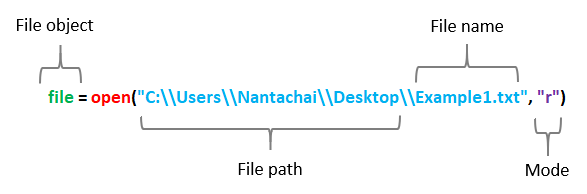

In this figure, the file **Example1.txt** is stored on the desktop.

You can use forward slashes (`/`) instead of backslashes (`\\`) in file paths:

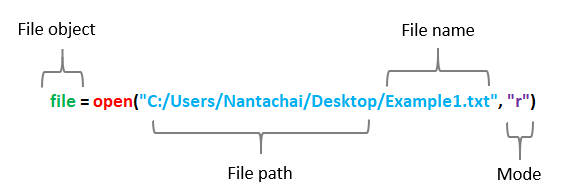

You may not need to specify the drive (e.g., `C:`) in the path if it is the same drive as your Jupyter Notebook:

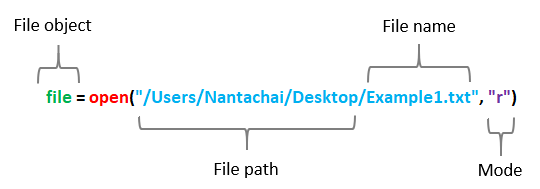

In Python, there are six different access modes that you can use when working with files:

`r` – **Read-only mode**. This mode allows you to read from the file, but you can’t make any changes to it. It raises an error if the file is not existing on your system.

`r+` – **Read + Write mode**. This mode allows you to read from and write to the file. It raises an error if the file is not existing on your system.

`w` – **Write-only mode**. This mode allows you to write to the file, but you can’t read from it. It creates the file if it does not exist on your system. It will overwrite if the file is present in your system.

`w+` – **Write + Read mode**. This mode allows you to read from and write to the file. It creates the file if it does not exist on your system. It will overwrite if the file is present in your system.

`a` – **Append-only mode**. This mode allows you to write to the file, but you can’t read from this mode. It creates the file if it does not exist on your system. It will add new data if the file already has data.

`a+` – **Append + Read mode**. This mode allows you to read from and write to the file. It creates the file if it does not exist on your system. It will add new data if the file already has data.

The mode argument is optional and the default value is `r`. In this notebook we only cover three modes:

`r` = Read-only mode for reading files

`w` = Write-only mode for writing files

`a` = Append-only mode for writing files (or adding data to files)

Let’s begin with the `r` mode. For this example, we will use the text file `Example1.txt`.

We read the file:

In [2]:
# Read the Example1.txt
# Do not forget to change the path to your path before running this code.
# See your path above!

file_path = '\M.eng\Machine learning\Example1.txt'
file1 = open(file_path, "r")

If the file is stored in the **same working directory** of your jupyter notebook, you do not have to specify the path.

In [3]:
# If file Example1.txt is stored in the same working directory as your jupyter notebook
# Read the Example1.txt

file1 = open('Example1.txt', "r")

In [4]:
file1

<_io.TextIOWrapper name='Example1.txt' mode='r' encoding='cp1252'>

We can view the attributes of the file.

The name of the file:

In [5]:
# Print the path of file

file1.name

'Example1.txt'

The mode the file object is in:

In [6]:
# Print the mode of file, either 'r' or 'w'

file1.mode

'r'

We can read the file and assign it to a variable using `read` method:

In [7]:
# Read the file

FileContent = file1.read()
FileContent

'Industrial Engineering Department\nFaculty of Engineering\nChulalongkorn University'

The **\n** means that there is a new line.

We can print the file:

In [8]:
# Print the file with '\n' as a new line

print(FileContent)

Industrial Engineering Department
Faculty of Engineering
Chulalongkorn University


The file is of type string:

In [9]:
# Type of file content

type(FileContent)

str

We must close the file object using `close` method:

In [10]:
# Close file after finish

file1.close()

### A Better Way to Open a File

Using the `with statement is considered better practice, as it automatically closes the file even if an exception occurs. The code will execute everything within the indented block and then close the file object.

In [11]:
# Open file using "with"
# Suppose Example1.txt is in the same working directory as your jupyter notebook. Otherwise, you have to specify the path.

with open('Example1.txt', "r") as file1:
    FileContent = file1.read()

The file object is closed, you can verify it by running the following cell:

In [12]:
# Verify if the file is closed

file1.closed

True

We can see the content in the file:

In [13]:
# See the content of file

print(FileContent)

Industrial Engineering Department
Faculty of Engineering
Chulalongkorn University


The syntax may be a bit confusing since the file object comes after the `as` statement. Additionally, the file is not explicitly closed. To clarify, we summarize the steps in the following figure:

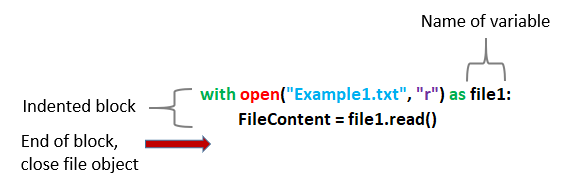

We don’t need to read the entire file; for example, we can read the first three characters by passing `3` as a parameter to the `read()` method:

In [14]:
# Read first three characters

with open('Example1.txt', "r") as file1:
    print(file1.read(3))

Ind


When the method `read(3)` is called, the first three characters of the file are read. If the method is called again, the next three characters are read. The output of the following cell demonstrates this process for different inputs to the `read()` method:

In [15]:
# Read certain amount of characters

with open('Example1.txt', "r") as file1:
    print(file1.read(3))
    print(file1.read(3))
    print(file1.read(20))
    print(file1.read(7))
    print(file1.read(5))

Ind
ust
rial Engineering Dep
artment

Facu


The process is illustrated in the figure below, where each color represents the portion of the file read after the `read()` method is called:

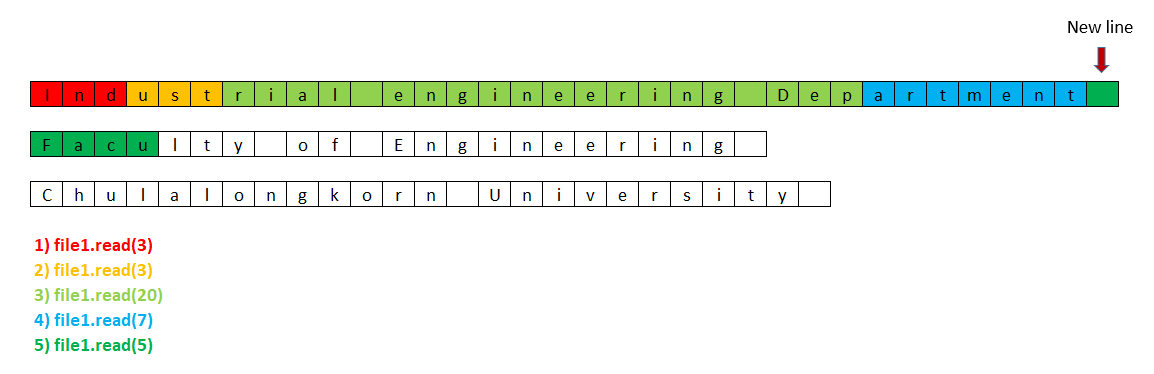

We can also read one line of the file at a time using the method `readline()`:

In [16]:
# Read one line

with open('Example1.txt', "r") as file1:
    print("first line: " + file1.readline())

first line: Industrial Engineering Department



We can use a loop to iterate through each line:

In [17]:
# Iterate through the lines

with open('Example1.txt', "r") as file1:
        i = 0;
        for line in file1:
            print("Iteration", str(i), ": ", line)
            i = i + 1;

Iteration 0 :  Industrial Engineering Department

Iteration 1 :  Faculty of Engineering

Iteration 2 :  Chulalongkorn University


In [18]:

with open('Example1.txt', "r") as file1:
        i = 0
        for line in file1:
            print("Iteration", i, ": ", line)
            i+=1

Iteration 0 :  Industrial Engineering Department

Iteration 1 :  Faculty of Engineering

Iteration 2 :  Chulalongkorn University


We can use the method `readlines()` to save the text file to a list:

In [19]:
# Read all lines and save as a list

with open('Example1.txt', "r") as file1:
    FileasList = file1.readlines()

FileasList

['Industrial Engineering Department\n',
 'Faculty of Engineering\n',
 'Chulalongkorn University']

In [20]:
# Print the first line

FileasList[0]

'Industrial Engineering Department\n'

In [21]:
# Print the second line

FileasList[1]

'Faculty of Engineering\n'

In [22]:
# Print the third line

FileasList[2]

'Chulalongkorn University'

<hr>

## Write and Save Files in Python

### Writing Files

We can create a file object and use the `write()` method to save text to a file. The file must be opened in write mode, which is specified using the argument `w`. Let’s create a file named `Example2.txt` and write the line: “Machine Learning.”

In [23]:
# Write file

with open('Example2.txt', 'w') as writefile:
    writefile.write("Machine Learning")

We can write multiple lines:

In [24]:
# Write lines to file

with open('Example2.txt', 'w') as writefile:
    writefile.write("Artificial Intelligence\n")
    writefile.write("Machine Learning\n")

The `write()` method is similar to the `readline()` method, except that instead of reading a line from a file, it writes a line to the file. This process is illustrated in the figure: the different color coding of the grid represents a new line added to the file with each method call.

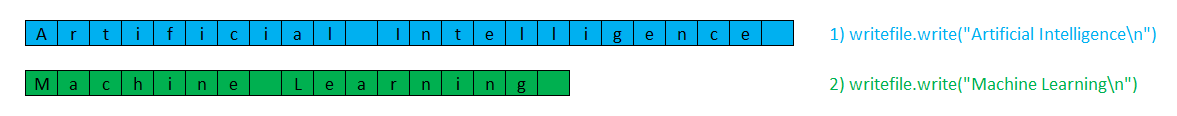

You can check the file to see if your results are correct

In [25]:
# Check whether write to file

with open('Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())

Artificial Intelligence
Machine Learning



In [26]:
# If you want to both write and read file, you can use mode w+ as follows:

with open('Example2.txt', 'w+') as test_write_and_read_file:
    test_write_and_read_file.write("Artificial Intelligence\n")
    test_write_and_read_file.write("Machine Learning\n")
    test_write_and_read_file.seek(0) # Moves the file pointer to the beginning of the file, so you can read its content after appending.
    print(test_write_and_read_file.read()) #ไม่ย้าย pointer จะไม่สามารถอ่าน/ปริ้นได้

Artificial Intelligence
Machine Learning



By setting the mode argument to append (`a`), you can add a new line to the file as follows:

In [27]:
# Write a new line to text file

with open('Example2.txt', 'a') as testwritefile:
    testwritefile.write("Deep Learning\n")

You can verify the file has changed by running the following cell:

In [28]:
# Verify if the new line is in the text file

with open('Example2.txt', 'r') as testwritefile:
    print(testwritefile.read())

Artificial Intelligence
Machine Learning
Deep Learning



In [29]:
# If you want to both append and read, you can use mode a+ as follows:

with open('Example2.txt', 'w') as writefile:
    writefile.write("Artificial Intelligence\n")
    writefile.write("Machine Learning\n")
    
with open('Example2.txt', 'a+') as test_append_and_read_file:
    test_append_and_read_file.write("Deep Learning\n")
    test_append_and_read_file.seek(0) # Moves the file pointer to the beginning of the file, so you can read its content after appending.
    print(test_append_and_read_file.read())

Artificial Intelligence
Machine Learning
Deep Learning



We can write a list to a **.txt** file as follows:

In [30]:
# Sample list of text

Lines = ["Land and House\n", "Sansiri\n", "Pruksa Real Estate\n"]
Lines

['Land and House\n', 'Sansiri\n', 'Pruksa Real Estate\n']

In [31]:
# Write the strings in the list to a new text file (Example3.txt)

with open('Example3.txt', 'w') as writefile:
    for line in Lines:
        print(line)
        writefile.write(line)

Land and House

Sansiri

Pruksa Real Estate



We can verify the file is written by reading it and printing out the values:

In [32]:
# Verify if writing to file is successfully executed

with open('Example3.txt', 'r') as testwritefile:
    print(testwritefile.read())

Land and House
Sansiri
Pruksa Real Estate



We can append to a file using the append mode (`a`). This adds to the file without overwriting its existing content.

In [33]:
# Append the line to the file

with open('Example3.txt', 'a') as testwritefile:
    testwritefile.write("Origin Property\n")

We can see the results of appending the file:

In [34]:
# Verify if the appending is successfully executed

with open('Example3.txt', 'r') as testwritefile:
    print(testwritefile.read())

Land and House
Sansiri
Pruksa Real Estate
Origin Property



### Copy a File

Let's copy the file `Example3.txt` to the file `Example4.txt`:

In [35]:
# Copy file to another

with open('Example3.txt','r') as readfile:
    with open('Example4.txt','w') as writefile:
          for line in readfile:
                writefile.write(line)

We can read the file to see if everything works:

In [36]:
# Verify if the copy is successfully executed

with open('Example4.txt','r') as testwritefile:
    print(testwritefile.read())

Land and House
Sansiri
Pruksa Real Estate
Origin Property



After reading files, we can also write data to files and save them in different formats, such as **.txt**, **.csv**, **.xls** (for Excel files), etc.

<hr>

## Working with and Saving data with Pandas

### Introduction to Pandas

In [37]:
# Import required library

import pandas as pd

After importing the library, we gain access to a large number of pre-built classes and functions, assuming the library is installed. One way Pandas allows you to work with data is through a dataframe. Let’s walk through the process of converting a comma-separated values (.csv) file into a dataframe.

The variable `csv_path` stores the path to the .csv file, which is passed as an argument to the `read_csv` function. The result is stored in the object `df`, a common shorthand for a Pandas dataframe.

If the data are separated by commas (`,`), you do not need to specify the `sep` parameter.

In [77]:
# Read data from CSV file

csv_path = 'https://perso.telecom-paristech.fr/eagan/class/igr204/data/cereal.csv'
df = pd.read_csv(csv_path, sep = ';')
df= pd.DataFrame(df)

We can use the `head()` method to view the **first five rows** of a dataframe.

In [54]:
# Print first five rows of the dataframe

df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912


We can specify the number of rows to display by passing a value inside the parentheses of `head()`.

In [55]:
# Print first three rows of the dataframe

df.head(3)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679


We can use the `tail()` method to view the **last five rows** of a dataframe.

In [56]:
# Print last five rows of the dataframe

df.tail()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
73,Triples,G,C,110,2,1,250,0,21,3,60,25,3,1,0.75,39.106174
74,Trix,G,C,110,1,1,140,0,13,12,25,25,2,1,1,27.753301
75,Wheat Chex,R,C,100,3,1,230,3,17,3,115,25,1,1,0.67,49.787445
76,Wheaties,G,C,100,3,1,200,3,17,3,110,25,1,1,1,51.592193
77,Wheaties Honey Gold,G,C,110,2,1,200,1,16,8,60,25,1,1,0.75,36.187559


Drop row 0, which shows the data type of each column, using the `drop()` method. <br>
In this context, `axis = 0` specifies rows, while `axis = 1` specifies columns.

In [57]:
df = df.drop([0], axis = 0)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [65]:
df1 = df.copy()
df1 = pd.DataFrame(df1)

In [66]:
df1.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
3,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
4,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


In [68]:
df1.drop(df[['vitamins']]],inplace=True,axis=1)

SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' (3177097808.py, line 1)

In [52]:
df1

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,3,1,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,3,1,1,33.983679
2,All-Bran,K,C,70,4,1,260,9,7,5,320,3,1,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,3,1,0.5,93.704912
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,3,1,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0,21,3,60,3,1,0.75,39.106174
73,Trix,G,C,110,1,1,140,0,13,12,25,2,1,1,27.753301
74,Wheat Chex,R,C,100,3,1,230,3,17,3,115,1,1,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3,17,3,110,1,1,1,51.592193


Reset the index to start from 0 using the `reset_index()` method.

In [43]:
# Reset index to start at 0

df = df.reset_index(drop=True)
df.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679
2,All-Bran,K,C,70,4,1,260,9,7,5,320,25,3,1,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14,8,0,330,25,3,1,0.5,93.704912
4,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843


We can access the column **vitamins** and assign it to a new dataframe **x**:

In [69]:
# Access to the column vitamins

x = df[['vitamins']]
x.head()

,vitamins
1,25
2,0
3,25
4,25
5,25


The process is shown in the figure:

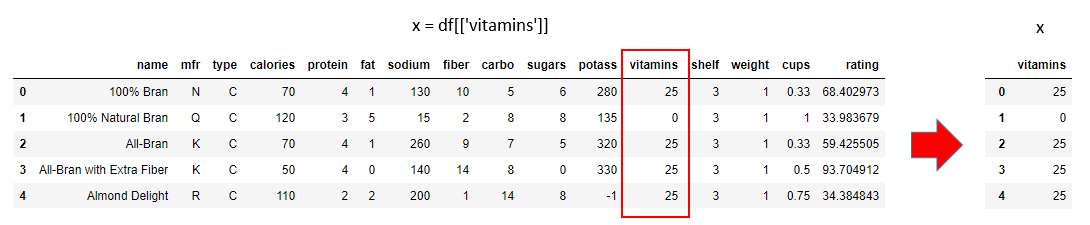

### Viewing Data and Accessing Data

You can also access a column as a series. A Pandas series can be thought of as a 1-D dataframe. To do this, use a **single bracket**:

In [70]:
x = df['vitamins']
x

1     25
2      0
3     25
4     25
5     25
      ..
73    25
74    25
75    25
76    25
77    25
Name: vitamins, Length: 77, dtype: object

You can also access a column as a dataframe. To do this, use **double brackets**. For example, you can assign the column **calories** to a new dataframe **x**:

In [71]:
# Get the column as a dataframe

x = df[['calories']]
print(type(x))
x

<class 'pandas.core.frame.DataFrame'>


,calories
1,70
2,120
3,70
4,50
5,110
...,...
73,110
74,110
75,100
76,100


You can do the same for multiple columns by specifying the dataframe name (e.g., `df`) and enclosing the column headers in double brackets. The result is a new dataframe containing only the specified columns:

In [72]:
# Access to multiple columns

y = df[['calories','protein','fiber','sugars']]
y.head()

,calories,protein,fiber,sugars
1,70,4,10,6
2,120,3,2,8
3,70,4,9,5
4,50,4,14,0
5,110,2,1,8


The process is shown in the figure:

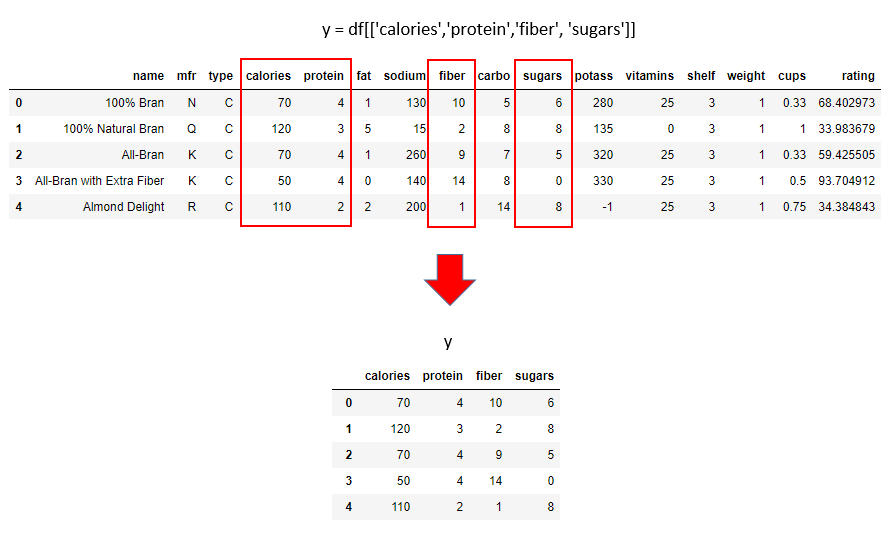

One way to access specific elements is by using the `iloc` method, which allows you to access the 1st row and 1st column as follows:

In [73]:
# Access the value on the first row and the first column

df.iloc[0, 0] 
#row index 0, column index 0

'100% Bran'

You can access the 3rd row and the 5th column as follows:

In [74]:
# Access the value on the third row and the fifth column

df.iloc[2,4]

'4'

You can also access a column using its name. However, you must use `loc` instead of `iloc` when accessing by **name** rather than **index**. <br>
The following examples achieves the same results as above:

In [78]:
# Access the column using the name

df.loc[0,'name'] #row = o, column = name

'String'

In [79]:
# Access the column using the name

df.loc[2, 'protein']

'3'

You can perform slicing using either the index or the column name:

In [80]:
# Slicing the dataframe using index

df.iloc[0:5, 0:4]

,name,mfr,type,calories
0,String,Categorical,Categorical,Int
1,100% Bran,N,C,70
2,100% Natural Bran,Q,C,120
3,All-Bran,K,C,70
4,All-Bran with Extra Fiber,K,C,50


In [81]:
# Slicing the dataframe using name
# Use .loc rather than .iloc
# Result includes column 'calories'

df.loc[0:4, 'name':'calories']

,name,mfr,type,calories
0,String,Categorical,Categorical,Int
1,100% Bran,N,C,70
2,100% Natural Bran,Q,C,120
3,All-Bran,K,C,70
4,All-Bran with Extra Fiber,K,C,50


In [82]:
# Get first row of the dataframe as a series
df.iloc[0]

name             String
mfr         Categorical
type        Categorical
calories            Int
protein             Int
fat                 Int
sodium              Int
fiber             Float
carbo             Float
sugars              Int
potass              Int
vitamins            Int
shelf               Int
weight            Float
cups              Float
rating            Float
Name: 0, dtype: object

In [83]:
# Get first row of the dataframe as a dataframe
df.iloc[:1]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float


In [84]:
# Get first three rows of the dataframe as a dataframe
df.iloc[:3]

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,String,Categorical,Categorical,Int,Int,Int,Int,Float,Float,Int,Int,Int,Int,Float,Float,Float
1,100% Bran,N,C,70,4,1,130,10,5,6,280,25,3,1,0.33,68.402973
2,100% Natural Bran,Q,C,120,3,5,15,2,8,8,135,0,3,1,1,33.983679


P.S.: If you provide the path to an Excel file, you can use the `read_excel` function:

In [93]:
# Read data from Excel File and print the first five rows
df2 = pd.read_excel(r'D:\M.eng\Machine learning\COVID-19-geographic-disbtribution-worldwide.xlsx')

### Exercise : Dataframe

Use the variable ***z*** to store the column '**name**' from the dataframe `df` as a dataframe, and display the first ten rows of this dataframe:

In [96]:
# Write your code below and press Shift+Enter to execute
z = df[['name']]
z.head(10)


,name
0,String
1,100% Bran
2,100% Natural Bran
3,All-Bran
4,All-Bran with Extra Fiber
5,Almond Delight
6,Apple Cinnamon Cheerios
7,Apple Jacks
8,Basic 4
9,Bran Chex


Assign the variable ***z*** to a dataframe consisting of the columns '**name**', '**fat**', and '**rating**' from `df`, and display the first four rows of this dataframe:

In [97]:
# Write your code below and press Shift+Enter to execute

z = df[['name','fat','rating']]
z.head(4)

,name,fat,rating
0,String,Int,Float
1,100% Bran,1,68.402973
2,100% Natural Bran,5,33.983679
3,All-Bran,1,59.425505


Access the 6th row and the 8th column of `df`:

In [98]:
# Write your code below and press Shift+Enter to execute
df.iloc[5:7]


,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
5,Almond Delight,R,C,110,2,2,200,1,14,8,-1,25,3,1,0.75,34.384843
6,Apple Cinnamon Cheerios,G,C,110,2,2,180,1.5,10.5,10,70,25,1,1,0.75,29.509541


'Access the 3rd row of the column '**rating**' of `df`:

In [92]:
df[['rating']].head(3)

,rating
0,Float
1,68.402973
2,33.983679


## End of Module 4

<hr>